 <font size="6"><center> <h1>Inlay design </h1> </center>

This is a V2 with improvements such as loops and better explanations. 

# The problem

We usually need a long pipe to get a fully laminar developped profile accroding to this picture below : 

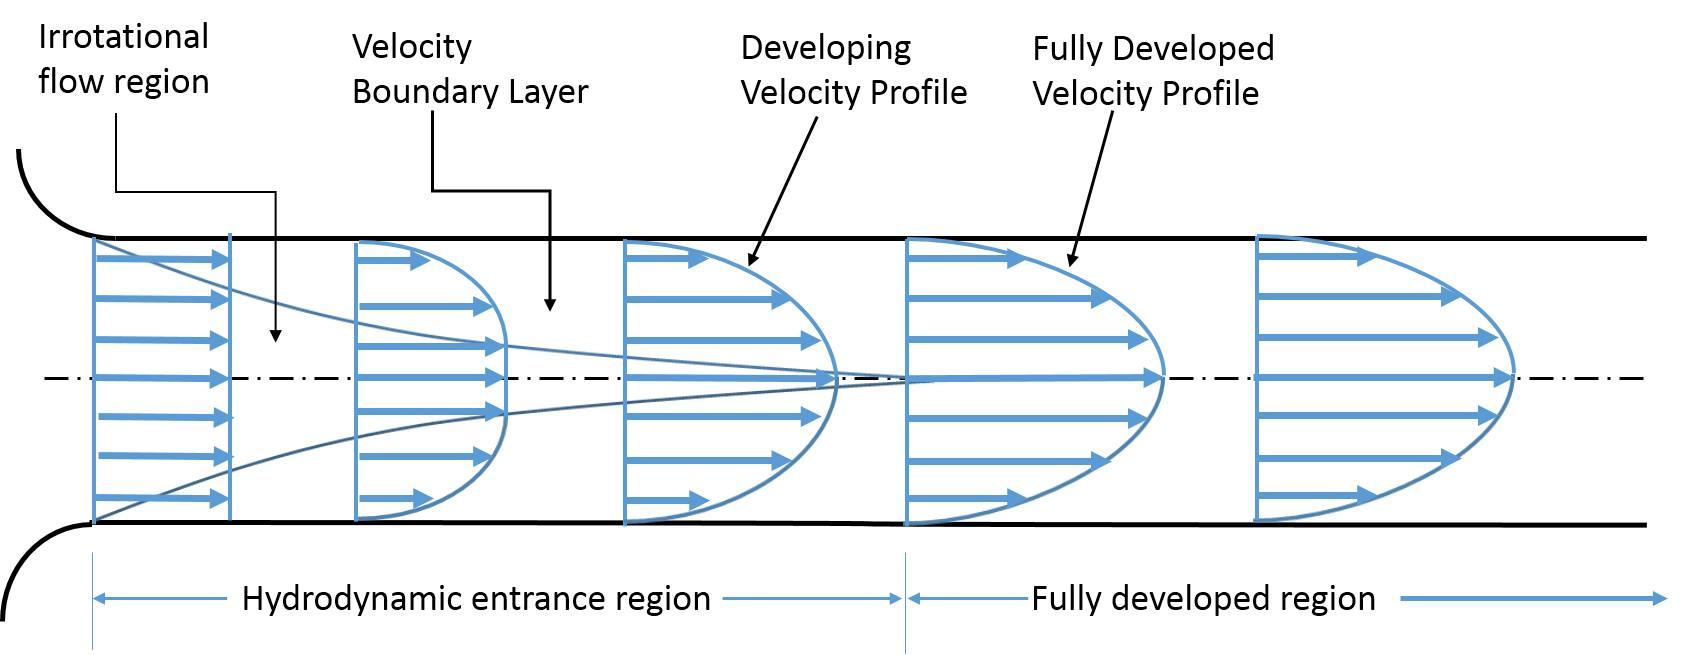

<p> In our case, we would like to shorten the pipe that is why we have to change the inlet velocity profile directly at the beginning of the pipe. 
<p> We will design an inlay to force the inlet profile to be quite close to parabolic.
<p> This inlay will be composed of rings of different thickness : 

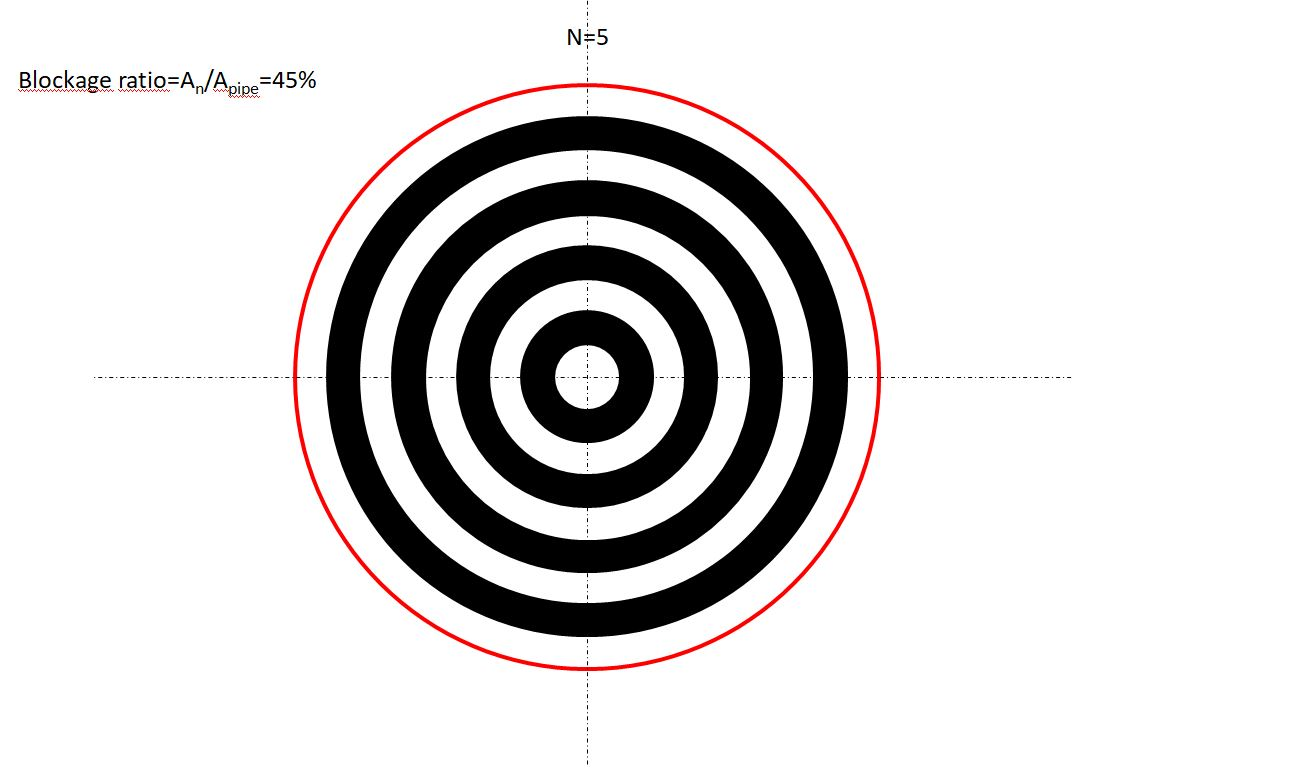

The rings will act like spheres : 

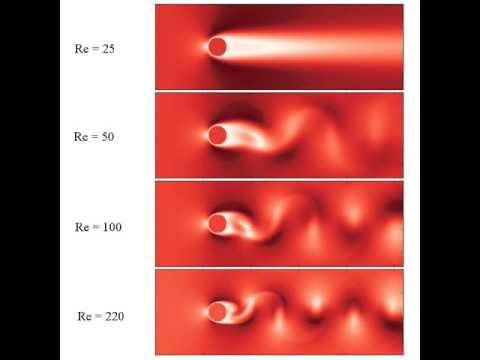

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('8WtEuw0GLg0', width=600, height=400)

We have to pay attention to respect a maximum local Reynolds Number of 50 because we want a laminar profile with no turbulence or Von Karman vortex street.

Here is a code to design rings in order to get a laminar parabolic profile at the inlet of a pipe.

# Import packages

First, we need to import all the packages that we need. 
<br> Numpy and matplotlib.pyplot to create arrays and plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

IPython to have a better plot display and ipywidgets if we want to include widgets to create an interface. 

In [3]:
from IPython.display import display
import ipywidgets as widgets

In [4]:
%matplotlib widget

# Useful constants

First, let's define all the constants. 

Air properties

In [5]:
nu=1.55e-5# kinematic visc m2/s
rho=1.2  # density kg/m3
mu=nu*rho # dynamic viscosity Pa.s

Device properties 

In [6]:
R=7e-3 #pipe radius m
rmax=R #rmax is the maximal radius

Expected parameters

In [7]:
Ub=5 # bulk velocity/mean velocity m/s
Uc=2*Ub # velocity at the centerline m/s
Reb=(Ub*2*R)/nu # general pipe Reynolds number based on bulk velocity 
Remax=50 # maximum local Reynolds number
N=10 # number of steps  
spl=1000 #number of samples that you want to print the rings

# Calculating each middle radius of future rings 

Let's calculate radius of the middle of the future rings.

In [8]:
radius=[]
for i in range (N):
    radius.append(i*R/N)
radius.append(rmax) # we choose to add the radius of the pipe
radius

[0.0,
 0.0007,
 0.0014,
 0.0021000000000000003,
 0.0028,
 0.0035000000000000005,
 0.004200000000000001,
 0.0049,
 0.0056,
 0.0063,
 0.007]

# Lambda

We start with computing the friction coefficient $\lambda$.
<br> $\lambda=8.\left(\frac{U_{\tau}}{U_{b}}\right)^{2}$ by definition where $U_{\tau}=\sqrt{\frac{\tau}{\rho}}$ is the shear velocity (m/s).
<p> In laminar case, we can use the law $\lambda=\frac{64}{Re_{b}}$ which brings $\lambda=\frac{8.\tau}{\rho.U_{b}}$.

In [9]:
lambd=64/Reb
lambd

0.014171428571428571

# Shear stress 

Hence, we deduce can deduce the shear stress (N/m2) which is $\tau=\frac{\lambda.\rho.U_{b}^{2}}{8}$.

In [10]:
tau=(lambd*rho*Ub**2)/8
tau

0.05314285714285714

# dpdx

The next step is to determine the pressure gradient $\frac{dp}{dx}$ (Pa/m).
<br> We can use two methods which will give the same results : 

<li> 1st method

We use this formula : $\tau=-\frac{R}{2}\frac{dp}{dx}$
<br> hence $\frac{dp}{dx}=\frac{-2.\tau}{R}$

In [11]:
dpdx=-2*tau/R
dpdx

-15.183673469387752

<li> 2nd method

We use the solution of the Navier-Stockes equation in the case of laminar, incompressible air flow : 
<br> $u(r)=-\frac{R^{2}}{4.\mu}.\frac{dp}{dx}.\left(1-\left(\frac{r}{R}\right)^{2}\right)$
<br> At the centerline, we have $u(r=0)=U_{c}=-\frac{R^{2}}{4.\mu}.\frac{dp}{dx}$
<br> and we know $U_{c}$ because it is a parameter that we chose at the beginning
<p> We can deduce $\frac{dp}{dx}=\frac{-4.\mu.U_{c}}{R^{2}}$

In [12]:
dpdx2=-(8*mu*Ub)/(R**2)
dpdx2

-15.183673469387756

# Velocities at each r

Now, we can campute the velocity at each middle radius of the future rings using the prvious solution of Navier-Stockes equation.

In [13]:
velocities=[]
for i in range (N+1):
    velocities.append(-((R**2)/(4*mu))*dpdx*(1-(radius[i]/R)**2))
velocities

[9.999999999999998,
 9.899999999999999,
 9.599999999999998,
 9.099999999999998,
 8.399999999999999,
 7.499999999999997,
 6.399999999999998,
 5.099999999999999,
 3.6000000000000005,
 1.899999999999999,
 0.0]

Then, we can plot the velocity profile. 
<br> Here we plot the parabolic equation and the velocity vector at each middle radius of the future rings. 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
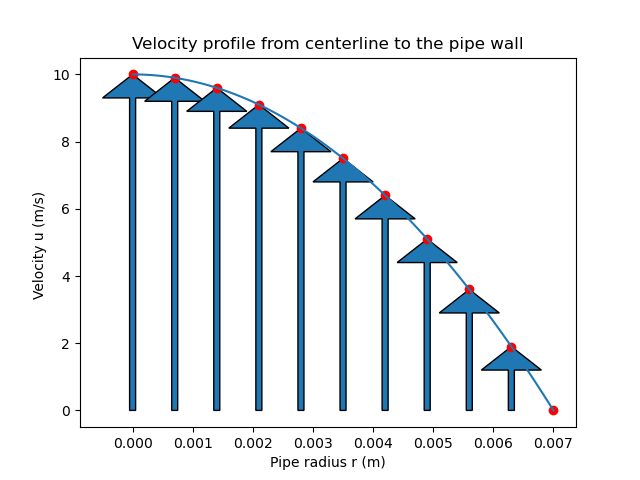

In [14]:
plt.figure()
plt.title("Velocity profile from centerline to the pipe wall")

abscissa1 = np.linspace(0,R,N+1)# abscissa for the arrow and marker plot

for i in range (N+1):
    plt.plot(radius[i],velocities[i],marker="o", color="red")#plot of the markers
    plt.arrow(abscissa1[i], 0, 0, velocities[i],width=0.0001,length_includes_head=True,head_width=0.001, head_length=0.7)
#plot of the arrows    

abscissa2 = np.linspace(0,R,100)# abscissa for the parabolic profile plot, we use 100 samples to have a smooth curve
vel_profile = -((R**2)/(4*mu))*dpdx*(1-((abscissa2**2)/(R**2)))
plt.plot(abscissa2,vel_profile)

plt.ylabel("Velocity u (m/s) ")
plt.xlabel("Pipe radius r (m)")

plt.show()

# Circles thickness

Now, we have all the elements to get the thickness of each rings. 
<br> Of course, the Remax will be respected at each locations to avoid turbulent raw. 
<p> The $Re_{max}$ is the maximum local Reynold number defined by : $Re_{max}=\frac{d_{i}.u(r_{i})}{\nu}$
<p> where $u(r_{i})$ is the velocity at the middle radius of the i th ring. 
<br> and $d_{i}$ is the thickness of the i th ring. 

In [15]:
thickness=[]
for i in range (1,N):
    thickness.append(nu*Remax/velocities[i])
thickness

[7.82828282828283e-05,
 8.072916666666669e-05,
 8.51648351648352e-05,
 9.226190476190479e-05,
 0.00010333333333333338,
 0.00012109375000000005,
 0.00015196078431372554,
 0.00021527777777777778,
 0.0004078947368421055]

# Plotting rings

We can plot the rings. 
First, we have to delete the 0 radius and the maximum radius R because they are not useful to plot the rings.

In [16]:
radius2=radius.copy()
del radius2[0]
del radius2[N-1]
radius2

[0.0007,
 0.0014,
 0.0021000000000000003,
 0.0028,
 0.0035000000000000005,
 0.004200000000000001,
 0.0049,
 0.0056,
 0.0063]

Here we use the formulas of the circle equation for x and y : 
<br> $x=r.cos(\theta)$
<br> $y=r.sin(\theta)$

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
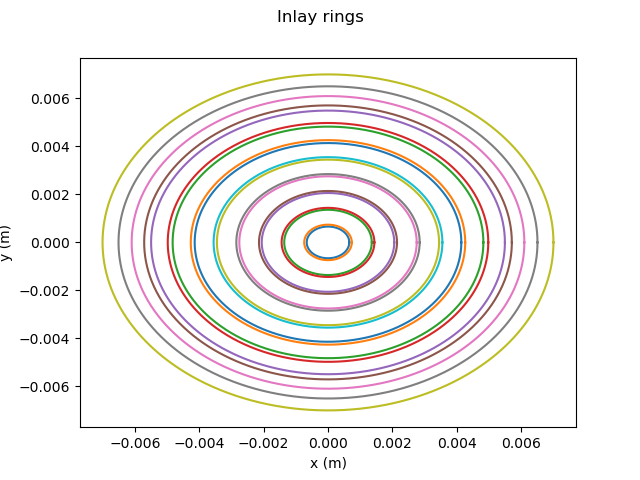

In [17]:
theta = np.linspace(0, 2*np.pi, spl)#creation of a angles list

plt.figure()

x_coord=[]#list for x coordinates saving 
y_coord=[]#same for y

for i in range (N-1):
    rint=radius2[i]-(thickness[i]/2)
    rext=radius2[i]+(thickness[i]/2)
    xint = rint*np.cos(theta)#abscissas of inner circle
    yint = rint*np.sin(theta)#ordinates of inner circle
    xext = rext*np.cos(theta)#abscissas of outer circle
    yext = rext*np.sin(theta)#ordinates of outer circle
    x_coord.append(xint)#saving coordinates in arrays
    x_coord.append(xext)
    y_coord.append(yint)
    y_coord.append(yext)
    plt.plot(xint,yint)#ploting inner circle
    plt.plot(xext,yext)#same with outer circle
plt.plot(R*np.cos(theta),R*np.sin(theta))#plot of the pipe boundary with a radius of R, only for visualization

plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.suptitle('Inlay rings')
plt.show()

Plot with legend and grid

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
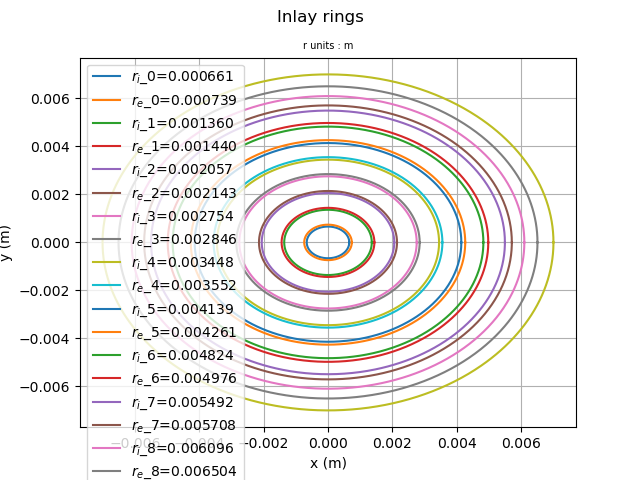

In [18]:
theta = np.linspace(0, 2*np.pi, spl)#creation of a angles list

plt.figure()

x_coord=[]#list for x coordinates saving 
y_coord=[]#same for y

for i in range (N-1):
    rint=radius2[i]-(thickness[i]/2)#definition of rint and rext
    rext=radius2[i]+(thickness[i]/2)
    xint = rint*np.cos(theta)#abscissas of inner circle
    yint = rint*np.sin(theta)#ordinates of inner circle
    xext = rext*np.cos(theta)#abscissas of outer circle
    yext = rext*np.sin(theta)#ordinates of outer circle
    x_coord.append(xint)#saving coordinates in arrays
    x_coord.append(xext)
    y_coord.append(yint)
    y_coord.append(yext)
    plt.plot(xint,yint,label=f"$r_i$_%d=%f"%(i,rint))#plot the inner ring with corresponding label
    plt.plot(xext,yext,label=f"$r_e$_%d=%f"%(i,rext))#same with outer ring 
    
plt.plot(R*np.cos(theta),R*np.sin(theta))#plot of the pipe boundary with a radius of R, only for visualization

plt.xlabel('x (m)')
plt.ylabel('y (m)')

#plt.legend(bbox_to_anchor = (1, 1))
#delete# to activate this line, if you want to displace the legend outside the plot

plt.suptitle('Inlay rings')
plt.title('r units : m',fontsize=7)
plt.grid()
plt.legend()
plt.show()
plt.savefig('Inlay rings',format='jpg')
#saving the figure in the format that you want :eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff

plot with color change

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
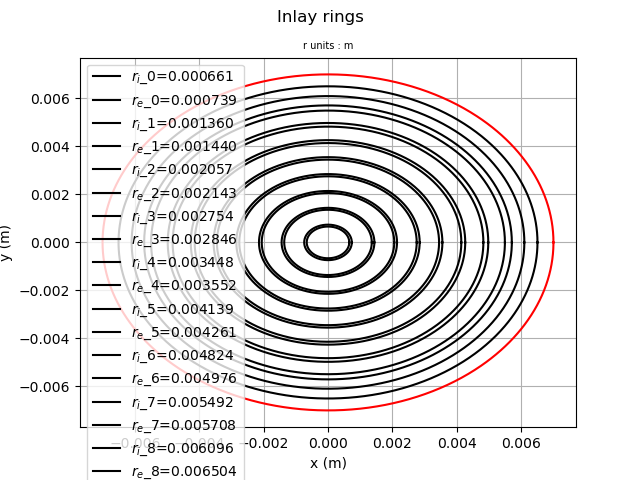

In [19]:
theta = np.linspace(0, 2*np.pi, spl)#creation of a angles list

plt.figure()

x_coord=[]#list for x coordinates saving 
y_coord=[]#same for y

for i in range (N-1):
    rint=radius2[i]-(thickness[i]/2)#definition of rint and rext
    rext=radius2[i]+(thickness[i]/2)
    xint = rint*np.cos(theta)#abscissas of inner circle
    yint = rint*np.sin(theta)#ordinates of inner circle
    xext = rext*np.cos(theta)#abscissas of outer circle
    yext = rext*np.sin(theta)#ordinates of outer circle
    x_coord.append(xint)#saving coordinates in arrays
    x_coord.append(xext)
    y_coord.append(yint)
    y_coord.append(yext)
    plt.plot(xint,yint,label=f"$r_i$_%d=%f"%(i,rint),color='black')#plot the inner ring with corresponding label
    plt.plot(xext,yext,label=f"$r_e$_%d=%f"%(i,rext),color='black')#same with outer ring 
plt.plot(R*np.cos(theta),R*np.sin(theta),color='red')#plot of the pipe boundary with a radius of R, only for visualization

plt.xlabel('x (m)')
plt.ylabel('y (m)')

#plt.legend(bbox_to_anchor = (1, 1))
#delete# to activate this line, if you want to displace the legend outside the plot

plt.suptitle('Inlay rings')
plt.title('r units : m',fontsize=7)
plt.grid()
plt.legend()
plt.show()

<ipython-input-20-df48c559639d>:13: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-20-df48c559639d>:13: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-20-df48c559639d>:13: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-20-df48c559639d>:13: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-20-df48c559639d>:13: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-20-df48c559639d>:13: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-20-df48c559639d>:13: RuntimeWarning: invalid value encountere

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
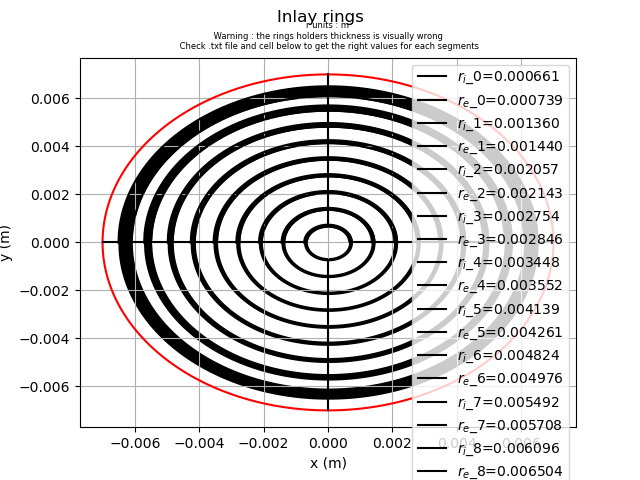

In [20]:
plt.figure()

Rint=[]
Rext=[]

for i in range (N-1):
    rint=radius2[i]-(thickness[i]/2)#definition of rint and rext
    rext=radius2[i]+(thickness[i]/2)
    Rint.append(rint)#saving rint in a list
    Rext.append(rext)#same with rext
    x=np.linspace(-rext,rext,spl,endpoint=True)
    yext = rext*np.sin(np.arccos(x/rext))#ordinates of outer circle
    yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
    yint[np.isnan(yint)] = 0
    plt.plot(x,yint,label=f"$r_i$_%d=%f"%(i,rint),color='black')#plot the inner ring with corresponding label
    plt.plot(x,yext,label=f"$r_e$_%d=%f"%(i,rext),color='black')#same with outer ring 
    plt.fill_between(x, yint, yext, color='black')
    plt.fill_between(x, -yext, -yint, color='black')
plt.plot(R*np.cos(theta),R*np.sin(theta),color='red')#plot of the pipe boundary with a radius of R, only for visualization

plt.plot([radius2[0]+thickness[0]/2,R],[0,0],color='black')
plt.plot([-(radius2[0]+thickness[0]/2),-R],[0,0],color='black')                    
plt.plot([0,0],[radius2[0]+thickness[0]/2,R],color='black')
plt.plot([0,0],[-(radius2[0]+thickness[0]/2),-R],color='black')
                      
plt.xlabel('x (m)')
plt.ylabel('y (m)')

#plt.legend(bbox_to_anchor = (1, 1))
#delete# to activate this line, if you want to displace the legend outside the plot

#radius_h=[]
#for i in range (N-2):
#    radius_h.append(Rext[i]+((Rint[i+1]-Rext[i])/2))
#radius_h.append(Rext[N-2]+((R-Rext[N-2])/2))
#radius_h.append(rmax) we choose to add the radius of the pipe
#plt.plot(radius_h,np.linspace(0,0,N-1),marker="o")

rings_radius_int_ext=open('rings_radius_int_ext.txt','w')
rings_radius_int_ext.write("rint\n")
for d in Rint:
    rings_radius_int_ext.write(f"{d}\n")
rings_radius_int_ext.write("\nrext\n")  
for d in Rext:
    rings_radius_int_ext.write(f"{d}\n")
rings_radius_int_ext.close()

plt.suptitle('Inlay rings')
plt.title('r units : m\n Warning : the rings holders thickness is visually wrong \n Check .txt file and cell below to get the right values for each segments',fontsize=6)
plt.grid()
plt.legend()
plt.show()

In [21]:
Rint

[0.0006608585858585859,
 0.0013596354166666665,
 0.0020574175824175827,
 0.0027538690476190475,
 0.0034483333333333336,
 0.004139453125,
 0.0048240196078431375,
 0.005492361111111111,
 0.006096052631578947]

In [22]:
Rext

[0.0007391414141414141,
 0.0014403645833333334,
 0.002142582417582418,
 0.0028461309523809524,
 0.0035516666666666674,
 0.004260546875000001,
 0.004975980392156862,
 0.005707638888888889,
 0.006503947368421053]

# Thickness of the rings holders

We have the same problem with the rings holders : we have to calculate their thickness regarding the maximum Reynolds number. 

Let's calculate the middle radius of the empty areas.

In [23]:
radius_h=[]
for i in range (N-2):
    radius_h.append(Rext[i]+((Rint[i+1]-Rext[i])/2))
radius_h.append(Rext[N-2]+((R-Rext[N-2])/2))
radius_h

[0.0010493884154040402,
 0.001748891082875458,
 0.0024482257326007327,
 0.003147232142857143,
 0.003845559895833334,
 0.00454228324142157,
 0.005234170751633987,
 0.0059018457602339185,
 0.006751973684210526]

In [24]:
velocities_h=[]
for i in range (N-1):
    velocities_h.append(-((R**2)/(4*mu))*dpdx*(1-(radius_h[i]/R)**2))
velocities_h

[9.775262031350161,
 9.375791832701776,
 8.776773624945223,
 7.97855710999323,
 6.981973283175166,
 5.789318970347091,
 4.408868682191695,
 2.8914727800834523,
 0.696092115862965]

In [25]:
thickness_h=[]
for i in range (N-1):
    thickness_h.append(nu*Remax/velocities_h[i])
thickness_h

[7.928176221921254e-05,
 8.26596850515475e-05,
 8.830124065149703e-05,
 9.713535784926626e-05,
 0.00011100013829436428,
 0.00013386721373784245,
 0.00017578205563943886,
 0.00026802949878630103,
 0.0011133583937223749]

In [26]:
rings_holders_thickness=open('rings_holders_thickness.txt','w')
rings_holders_thickness.write("holders thickness (from the 1st ring to the pipe wall)\n\n")
for d in thickness_h:
    rings_holders_thickness.write(f"{d}\n")
rings_holders_thickness.close()

# Saving coordinates in a .txt file

It doesn't work but here there are some ideas ...
<p> still in process ...

In [27]:
res_file=open('rings_coordinates.txt','w')
for d in x_coord[0]:
    res_file.write(f"{d}\n")
res_file.close()

In [28]:
xarray = np.array([0,1,2,3,4,5])
yarray = np.array([0,10,20,30,40,50])
#here is your data, in two numpy arrays

data = np.array([xarray, yarray])
data = data.T
#here you transpose your data, so to have it in two columns

datafile_path = "/your/data/output/directory/datafile.txt"
with open(datafile_path, 'w+') as datafile_id:
#here you open the ascii file

    np.savetxt(datafile_id, data, fmt=['%d','%d'])
    #here the ascii file is written. 

FileNotFoundError: [Errno 2] No such file or directory: '/your/data/output/directory/datafile.txt'

# Print dependences

In [ ]:
%load_ext watermark
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets;watermark